## ACTIVIDAD COMPLEMENTARIA N°1

Enunciado 

Un recipiente cilíndrico de vidrio pyrex tiene un diámetro interno de 50mm, paredes de 5mm de
espesor y está protegido con una capa de 10mm de neopreno. En el interior tiene un líquido a 40°C,
y está expuesto a un ambiente que tiene una temperatura de 20°C. Los coeficientes de convección
interior y exterior son de 100 y 10W/m2 K respectivamente. Considerar que la unión entre los
materiales no es perfecta, la cual se puede modelar con una conductancia interfacial de 150W/m2K.

Se pide calcular, considerando régimen estacionario unidimensional:

1.- Flujo de calor por unidad de longitud a través del recipiente.

2.- Temperaturas de las superficies interior, exterior, y las 2 de la interface.

3.- Obtener una expresión del vector densidad de flujo de calor para cada punto del conjunto pyrexneopreno. Graficar ¿Qué diferencia sustancial se puede apreciar en este, respecto a la versión de
placa plana del mismo ejercicio realizado en clase? ¿A qué se debe?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Esquema de Resolución

Características del problema:
+ Convección 
+ Conducción 1D
+ Estacionario
+ Sin generación de calor Volumétrica

Planteamos el primer principio:
$$
\rho V C_{p} \frac{\partial T}{\partial t}=\dot{q}+Q_{v}
$$

Llegamos a que $\dot{q}$ que representa el flujo de calor neto, es nulo. Es decir que lo que ingresa al sistema es igual a lo que egresa y no hay acumulación de energía en el sistema.


Nuestro problema lo podemos modelar por la analogía Eléctrica:

![Esquema de Analogía Eléctrica](Analog_electrica.jpg)




Resolvemos el ejercicio por unidad de longitud del cilindro

+ Resistencia por convencción
$$
R_{conv}=\frac{1}{h_{conv}*\pi * D}
$$

+ Resistencia por conducción en Cilindro

$$
R_{cond}=\frac{ln(r_{2}/r_{1})}{2\pi K }
$$

### a) Flujo de Calor por unidad de longitud

In [2]:
#Temperaturas 
T_int=40 #°C
T_ext=20 #°C

Dt=(T_int-T_ext) #°C
#Características de los materiales
K_neopreno=0.16 #W/mK
K_pyrex=1.4 #W/mK
h_int=100 #W/m2K
h_ext=10 #W/m2K
h_interf=150 #W/m2K

#Características geométricas por unidad de longitud
A_sup_int= np.pi*50/1000 #m2
A_interf= np.pi*60/1000 #m2
A_ext= np.pi*80/1000 #m2

# Defino Resistencias térmicas

R_conv_int=1/(h_int*A_sup_int)
R_pyrex=np.log(60/50)/(2*np.pi*K_pyrex)
R_interf=1/(h_interf*A_interf)
R_neopreno=np.log(80/60)/(2*np.pi*K_neopreno)
R_conv_ext=1/(h_ext*A_ext)

R_total=R_conv_int+R_pyrex+R_interf+R_neopreno+R_conv_ext

#Calculo la transferencia de calor
q=Dt/R_total

print('La transferencia de calor es:',q,'W/m')

La transferencia de calor es: 24.881611824868326 W/m


### b) Temperaturas intermedias

In [3]:
#Calculo de Temperaturas
T_sup_int= T_int-q*R_conv_int
T_interf_int= T_sup_int-q*R_pyrex
T_interf_Ext= T_interf_int-q*R_interf
T_sup_ext= T_interf_Ext-q*R_neopreno

temperaturas=[T_sup_int,T_interf_int,T_interf_Ext,T_sup_ext,T_ext]
nombres=['T_sup_int','T_interf_int','T_interf_Ext','T_sup_ext','T_ext']
df=pd.DataFrame(temperaturas,index=nombres,columns=['Temperatura (°C)'])
print(df)

              Temperatura (°C)
T_sup_int            38.415987
T_interf_int         37.900274
T_interf_Ext         37.020267
T_sup_ext            29.900079
T_ext                20.000000


### c) Densidad flujo de calor en Pyrex-Neopreno

Recordamos la ley de fourier:

$$
\vec{q}=-k\nabla T
$$

Expresada en coordenadas cilíndricas, cuyos términos cumplen que $\partial/\partial \theta = 0$ y $\partial/\partial z = 0$, entonces obtenemos:

$$
\vec{q}=-k\frac{\partial T}{\partial r}\hat{r}
$$

A partir del primer principio escrito de forma integral, recordando las hipótesis mencionadas, llegamos a la ecuación de Laplace:

$$
\nabla^{2}T=0
$$

Y escrita en coordenadas polares, nos queda

$$
\frac{1}{r}\frac{\partial }{\partial r}\left( k r \frac{\partial T}{\partial r}\right)=0
$$

Integrando obtenemos que:

$$
\frac{\partial T}{\partial r}=\frac{C}{r}
$$




Para cada material tendremos un campo de Temperaturas cuya expresión es:
$$
T_{(r)}=C_{1}Ln(r)+C_{2}
$$

reemplazando con condiciones de contorno, obtenemos los valores de las constantes en cada caso

Para el **Pyrex** $( r_1 \leq r \leq r_2 )$:

\begin{equation}
T_{\text{pyrex}}(r) = -\frac{q}{2\pi k_p} \ln\left(\frac{r}{r_1}\right) + T_{\text{int}}
\end{equation}

Para el **Neopreno** $( r_2 \leq r \leq r_3 )$:


\begin{equation}
T_{\text{neopreno}}(r) = -\frac{q}{2\pi k_n} \ln\left(\frac{r}{r_2}\right) + T_{\text{interfaz}}
\end{equation}





Finalmente el vector densidad flujo de calor nos queda expresado como:

$$
\vec{q}=-k\frac{C}{r}\hat{r}
$$

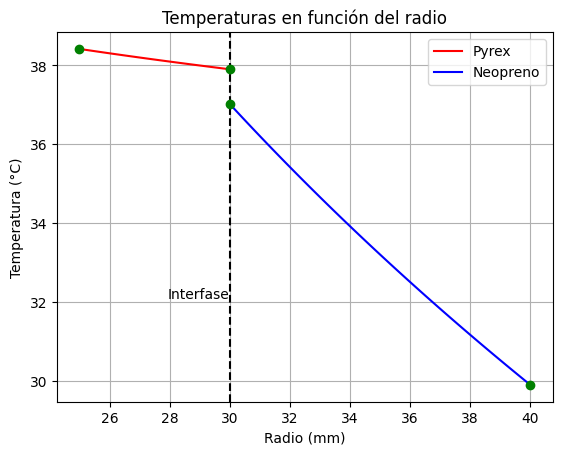

In [4]:
# Grafico de Temperaturas
rpyrex=np.linspace(50/2,60/2,50)
rneopreno=np.linspace(60/2,80/2,50)
Tpyrex=-q/(2*np.pi*K_pyrex)*np.log(rpyrex/25)+T_sup_int
Tneopreno=-q/(2*np.pi*K_neopreno)*np.log(rneopreno/30)+T_interf_Ext

plt.plot(rpyrex,Tpyrex,label='Pyrex',color='r')
plt.plot(rneopreno,Tneopreno,label='Neopreno',color='b')
plt.axvline(x=30,linestyle="--",color='k')
plt.text(30, T_interf_Ext - 5, 'Interfase', rotation=0, verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('Radio (mm)')
plt.plot([25,30,30,40],[T_sup_int,T_interf_int,T_interf_Ext,T_sup_ext],'o',color='g')
plt.title('Temperaturas en función del radio')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid()
plt.show()


In [5]:
import sympy as sp
from IPython.display import display, Math

# Definir las variables
r, q, k_n, r_2, T_interfaz, k_p, r_1, T_int = sp.symbols('r q k_n r_2 T_interfaz k_p r_1 T_int')

# Definir la expresión de la temperatura en el pyrex
T_pyrex = -q / (2 * sp.pi * k_p) * sp.ln(r / r_1) + T_int

# Calcular la derivada de la expresión con respecto a r
dT_pyrex_dr = sp.diff(T_pyrex, r)

# Mostrar la derivada en formato LaTeX
display(Math(r'\frac{{\partial T_{{\text{{pyrex}}}}}}{{\partial r}} = {}'.format(sp.latex(dT_pyrex_dr))))

# Definir la expresión de la temperatura en el neopreno
T_neopreno = -q / (2 * sp.pi * k_n) * sp.ln(r / r_2) + T_interfaz

# Calcular la derivada de la expresión con respecto a r
dT_neopreno_dr = sp.diff(T_neopreno, r)

# Mostrar la derivada en formato LaTeX
display(Math(r'\frac{{\partial T_{{\text{{neopreno}}}}}}{{\partial r}} = {}'.format(sp.latex(dT_neopreno_dr))))







<IPython.core.display.Math object>

<IPython.core.display.Math object>

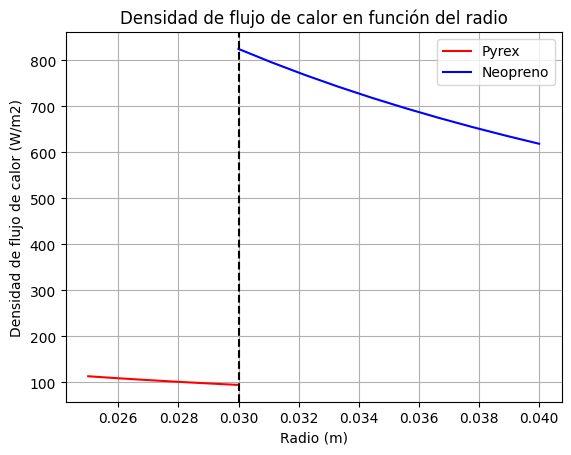

In [6]:
#Vector Densidad de flujo de calor
#Calculo la transferencia de calor
q=Dt/R_total

rpyrex=np.linspace(0.05/2,0.06/2,10)
rneopreno=np.linspace(0.06/2,0.08/2,10)
q_pyrex=q/(2*np.pi*K_pyrex*rpyrex)
q_neopreno=q/(2*np.pi*K_neopreno*rneopreno)

plt.plot(rpyrex,q_pyrex,label='Pyrex',color='r')
plt.plot(rneopreno,q_neopreno,label='Neopreno',color='b')
plt.axvline(x=0.03,linestyle="--",color='k')
plt.xlabel('Radio (m)')
plt.ylabel('Densidad de flujo de calor (W/m2)')
plt.title('Densidad de flujo de calor en función del radio')
plt.legend()
plt.grid()
plt.show()
